<a href="https://colab.research.google.com/github/KwanHoo/COCO_dataset_YOLOv5_test/blob/main/train_yolov5_COCO_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv5 모델 COCO 데이터셋을 활용하여 객체탐지 테스트

- Yolo v5 모델을 코코데이터셋으로 학습시키기

## COCO 데이터 셋 다운

In [ ]:
!curl -L "https://public.roboflow.com/ds/lwWghDdBvb?key=rGqFbRkRh3" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Streaming output truncated to the last 5000 lines.
 extracting: valid/labels/000000000139_jpg.rf.e21873da59c8d102916fa46e9a7d62f3.txt  
 extracting: valid/labels/000000000285_jpg.rf.60e3658db36698420a03e3fc071943f0.txt  
 extracting: valid/labels/000000000632_jpg.rf.bfddd0d2b86ac2bf1e80624422433f0a.txt  
 extracting: valid/labels/000000000724_jpg.rf.905934be986f8fbaedec06c48141a84e.txt  
 extracting: valid/labels/000000000776_jpg.rf.3a6b1375e3360b81da552a3054355666.txt  
 extracting: valid/labels/000000000785_jpg.rf.e08b383cecfdaaa774b3780ab5e06baa.txt  
 extracting: valid/labels/000000000802_jpg.rf.9717c2d9df9e467803d11f211672d1c4.txt  
 extracting: valid/labels/000000000872_jpg.rf.89b5c1b297b29c118dd11a202d91d647.txt  
 extracting: valid/labels/000000000885_jpg.rf.9bedbaab383445bc7ad6b3711224be3b.txt  
 extracting: valid/labels/000000001000_jpg.rf.a3c5a2484544de19f7cb041f2eb43605.txt  
 extracting: valid/labels/000000001268_jpg.rf.48cbad51033f60a71d4370e1b6cb12ca.txt  
 extracting: v

# YOLO v5 모델 깃허브로 클론 다운

In [ ]:
%cd /content
!pwd

/content
/content


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git #step1. execute this line on raberry py

Cloning into 'yolov5'...
remote: Enumerating objects: 15656, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (162/162), done.
remote: Total 15656 (delta 137), reused 176 (delta 101), pack-reused 15393
Receiving objects: 100% (15656/15656), 14.59 MiB | 19.82 MiB/s, done.
Resolving deltas: 100% (10666/10666), done.


# YOLO v5를 위한 패키지 설치

In [ ]:
#step 2

%cd /content/yolov5 
!pip install -r requirements.txt

/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.6 MB/s eta 0:00:00


## 데이터셋 폴더에 data.yaml
- train
- validation
- nc : 클래스 갯수
- 클래스 이름

In [ ]:
%cat /content/data.yaml

train: ../train/images
val: ../valid/images

nc: 80
names: ['aeroplane', 'apple', 'backpack', 'banana', 'baseball bat', 'baseball glove', 'bear', 'bed', 'bench', 'bicycle', 'bird', 'boat', 'book', 'bottle', 'bowl', 'broccoli', 'bus', 'cake', 'car', 'carrot', 'cat', 'cell phone', 'chair', 'clock', 'cow', 'cup', 'diningtable', 'dog', 'donut', 'elephant', 'fire hydrant', 'fork', 'frisbee', 'giraffe', 'hair drier', 'handbag', 'horse', 'hot dog', 'keyboard', 'kite', 'knife', 'laptop', 'microwave', 'motorbike', 'mouse', 'orange', 'oven', 'parking meter', 'person', 'pizza', 'pottedplant', 'refrigerator', 'remote', 'sandwich', 'scissors', 'sheep', 'sink', 'skateboard', 'skis', 'snowboard', 'sofa', 'spoon', 'sports ball', 'stop sign', 'suitcase', 'surfboard', 'teddy bear', 'tennis racket', 'tie', 'toaster', 'toilet', 'toothbrush', 'traffic light', 'train', 'truck', 'tvmonitor', 'umbrella', 'vase', 'wine glass', 'zebra']

train image 갯수 : 116408
valid image 갯수 : 5000

In [ ]:
%cd /
from glob import glob

t_img_list = glob('/content/train/images/*.jpg')

print(len(t_img_list))

/
116408


In [ ]:
v_img_list = glob('/content/valid/images/*.jpg')

print(len(v_img_list))

5000


### 트레이닝 이미지 경로, 벨리데이션 이미지 경로 txt 파일로 저장

In [ ]:
with open('/content/train.txt', 'w') as f:
  f.write('\n'.join(t_img_list) + '\n')

with open('/content/val.txt', 'w') as f:
  f.write('\n'.join(v_img_list) + '\n')

### data.yaml 수정 (train,validation)

In [ ]:
import yaml

with open('/content/data.yaml', 'r') as f:
  data = yaml.safe_load(f)#yaml.load(f)

print(data)

data['train'] = '/content/train.txt'
data['val'] = '/content/val.txt'

with open('/content/data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'train': '../train/images', 'val': '../valid/images', 'nc': 80, 'names': ['aeroplane', 'apple', 'backpack', 'banana', 'baseball bat', 'baseball glove', 'bear', 'bed', 'bench', 'bicycle', 'bird', 'boat', 'book', 'bottle', 'bowl', 'broccoli', 'bus', 'cake', 'car', 'carrot', 'cat', 'cell phone', 'chair', 'clock', 'cow', 'cup', 'diningtable', 'dog', 'donut', 'elephant', 'fire hydrant', 'fork', 'frisbee', 'giraffe', 'hair drier', 'handbag', 'horse', 'hot dog', 'keyboard', 'kite', 'knife', 'laptop', 'microwave', 'motorbike', 'mouse', 'orange', 'oven', 'parking meter', 'person', 'pizza', 'pottedplant', 'refrigerator', 'remote', 'sandwich', 'scissors', 'sheep', 'sink', 'skateboard', 'skis', 'snowboard', 'sofa', 'spoon', 'sports ball', 'stop sign', 'suitcase', 'surfboard', 'teddy bear', 'tennis racket', 'tie', 'toaster', 'toilet', 'toothbrush', 'traffic light', 'train', 'truck', 'tvmonitor', 'umbrella', 'vase', 'wine glass', 'zebra']}
{'train': '/content/train.txt', 'val': '/content/val.txt', 

### YOLO 학습 (이미지 사이즈:640, batch: 16, epochs: 1)
### YOLO 학습 cfg(모델)은 modles에 있음

In [ ]:
%cd /content/yolov5/

!python train.py --img 640 --batch 16 --epochs 1 --data /content/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name gun_yolov5s_results

/content/yolov5
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=1, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=gun_yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-165-ge382d4c Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anch

## Tensorboard로 학습 결과 확인

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/yolov5/runs/

# 예측 결과 확인

detect: weights=['/content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt'], source=/content/valid/images/000000338901_jpg.rf.0306627e5bf7e510a1ed2751fb032901.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-165-ge382d4c Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/valid/images/000000338901_jpg.rf.0306627e5bf7e510a1ed2751fb032901.jpg: 480x640 1 remote, 1 sofa, 42.4ms
Speed: 0.6ms pre-process, 42.4ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


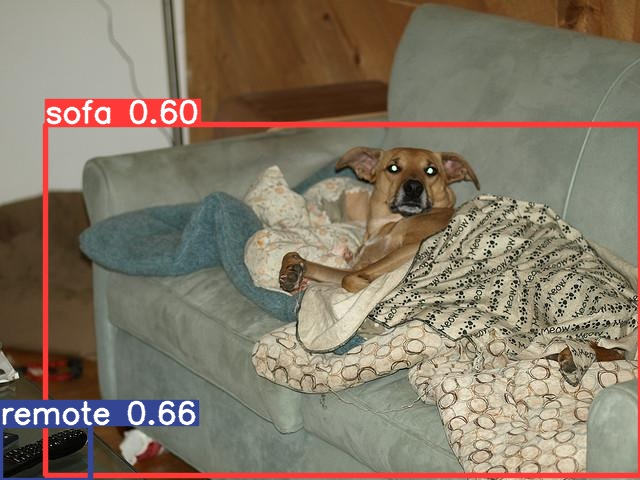

In [ ]:
from IPython.display import Image
import os

val_img_path = v_img_list[477]

#step3 (last) : move best.pt and execute this one line
!python detect.py --weights /content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt --img 640 --conf 0.5 --source "{val_img_path}"

Image(os.path.join('/content/yolov5/runs/detect/exp', os.path.basename(val_img_path)))

In [ ]:
t_img_list = glob('/content/yolov5/data/images/*.jpg')

print(len(t_img_list))

2


detect: weights=['/content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt'], source=/content/yolov5/data/images/zidane.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-165-ge382d4c Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/yolov5/data/images/zidane.jpg: 384x640 1 person, 67.7ms
Speed: 0.6ms pre-process, 67.7ms inference, 2.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


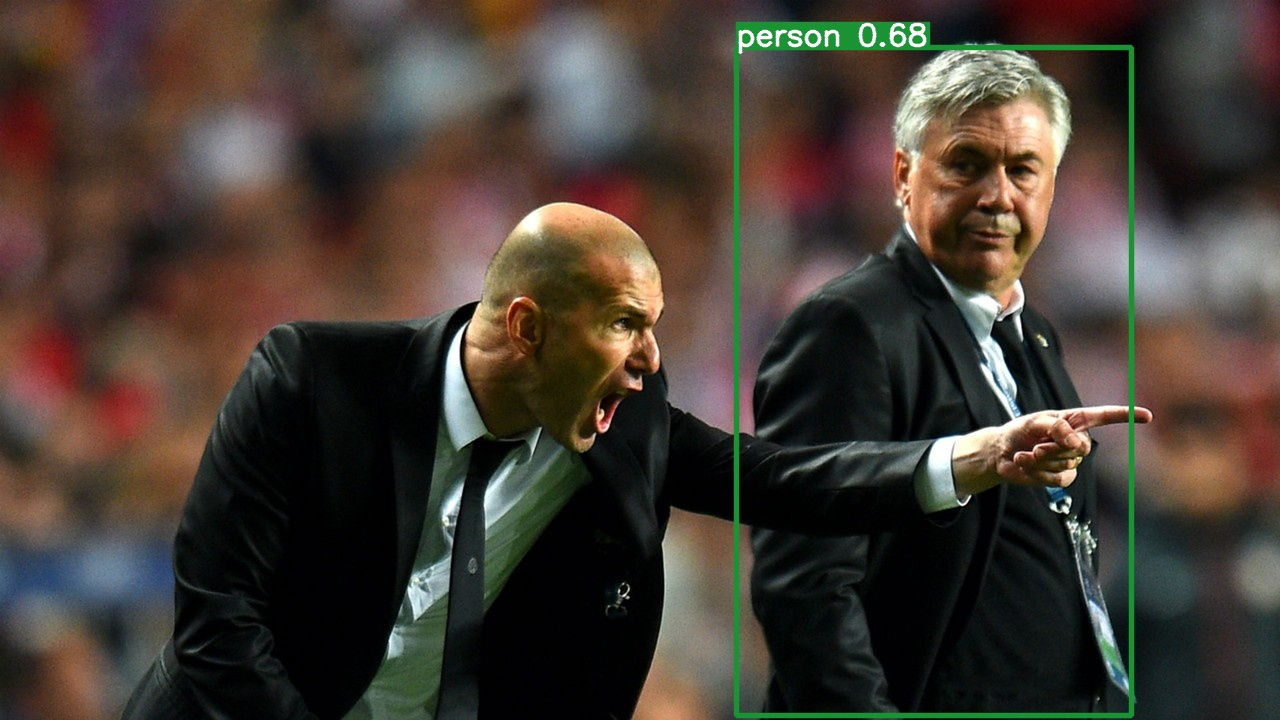

In [ ]:


test_img_path = t_img_list[0]


!python detect.py --weights /content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt --img 640 --conf 0.5 --source "{test_img_path}"

#Image(os.path.join('/content/yolov5/runs/detect/exp', os.path.basename(test_img_path))) # 원코드인데 오류
Image(os.path.join('/content/yolov5/runs/detect/exp2', os.path.basename(test_img_path)))